# Classic Handwritten Digit Recognition Demo using Keras
Code borrowed from [Simple MNIST convnet - Keras](https://keras.io/examples/vision/mnist_convnet/)

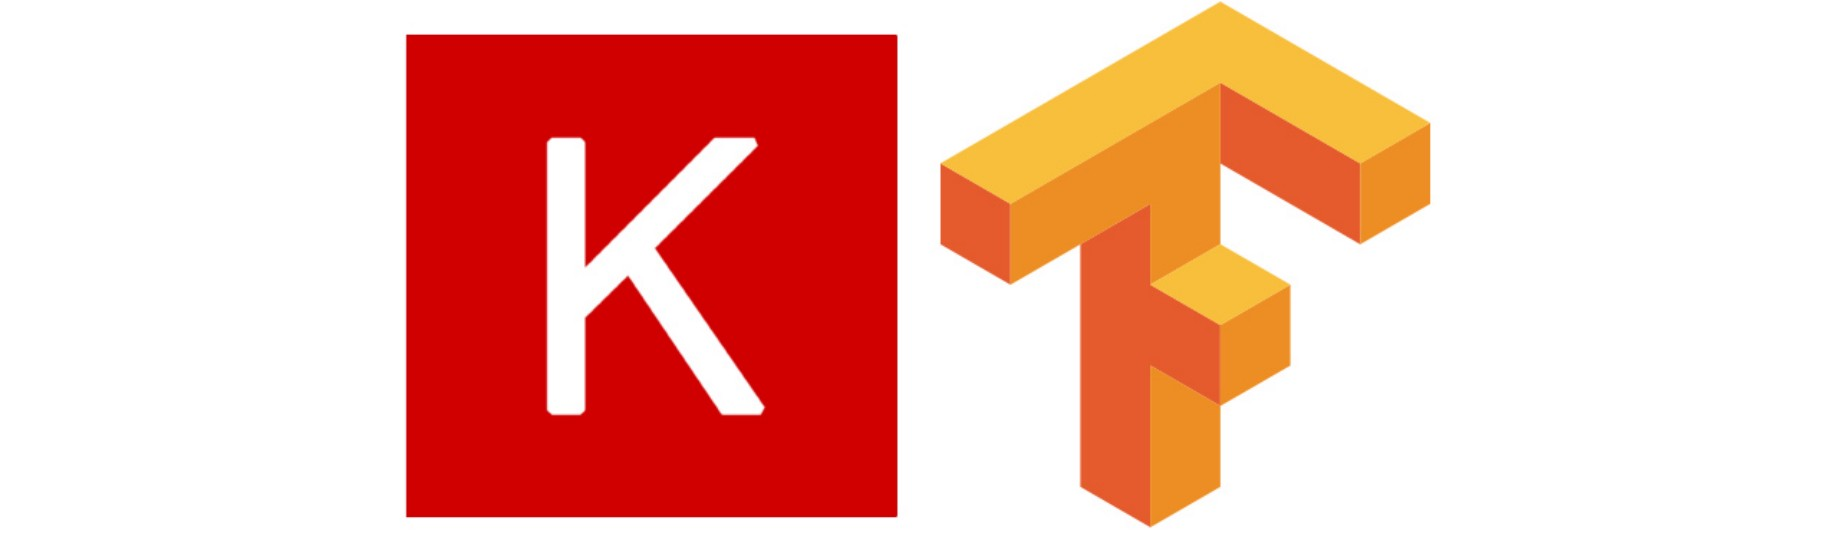

# FAQ
1. What is Tensorflow / Keras?
  - Tensorflow: ML library
  - Keras: high-level API for Tensorflow (originally supported other backends) (available under `tf.keras`)
2. What about PyTorch?
  - A ML library; popular alternative to TF
  - Maybe not today
3. Will I understand everything here?
  - Probably not. This is a just a preview of what will come after the break
4. How does it work roughly?
  - Keras (TF) + some algorithm > train with data > profit (model)
5. What can we do with ML?
  - Image recognition (what we are doing today)
  - Audio recognition (e.g. voice assistants)
  - Natural languag processing (NLP)
  - Analyze videos (cough cough YouTube)
  - Make weird art (with GAN)
  - Translate (e.g. Google Translate)
  - ...
6. What kind of ML algorithm are we going to use?
  - ConvNet (aka CNN, Convolutional Neural Network)
  - High accuracy
7. And what is ConvNet exactly?
  - High accuracy image recognition algorithm 
  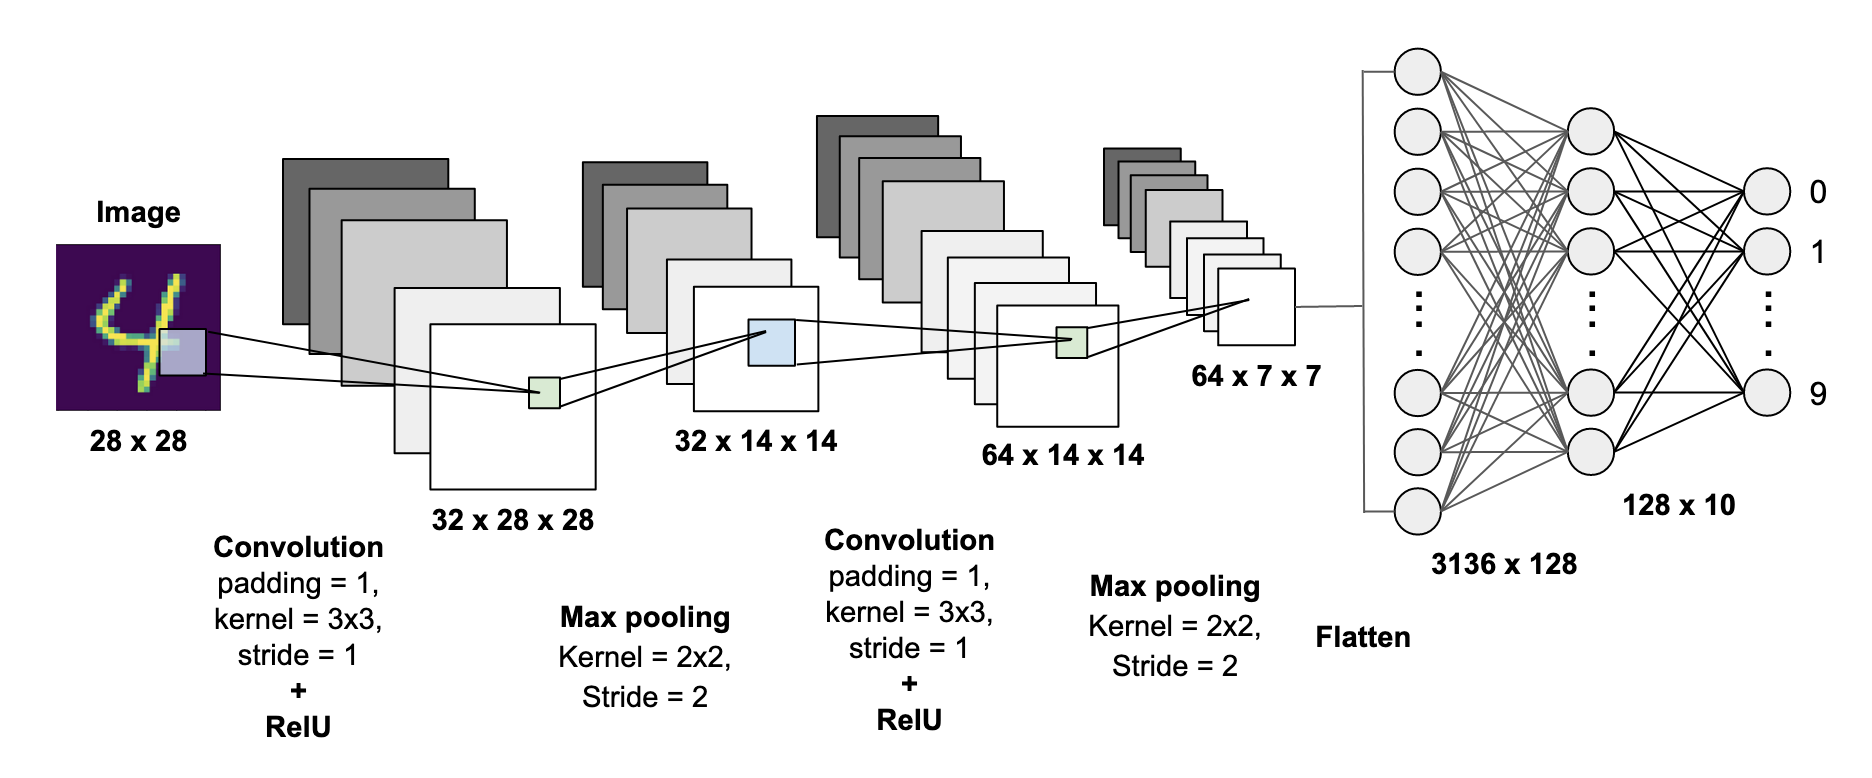

# Install packages in a virtual environment
You only have to do this if running locally
```sh
# use Python 3.6 - 3.8
pipenv install tensorflow jupyterlab ipykernel numpy
pipenv shell # --fancy
python -m ipykernel install --user --name=KERNEL_NAME
jupyter notebook # start the notebook
```

# Jupyter Notebook
- combine code with notes without clutter
    - visualization
    - explanation
    - equations
    - ...

## Setup

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualize the data

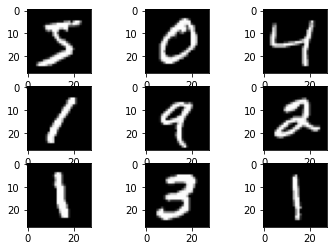

In [9]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 22s 53ms/step - loss: 0.3786 - accuracy: 0.8858 - val_loss: 0.0811 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 20s 46ms/step - loss: 0.1128 - accuracy: 0.9654 - val_loss: 0.0584 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0837 - accuracy: 0.9746 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0701 - accuracy: 0.9782 - val_loss: 0.0407 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 32s 77ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0356 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0316 - val_accuracy:

## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025311606004834175
Test accuracy: 0.9916999936103821
